In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

#Função para encontrar os coeficientes de ajuste da função f(x)
def ajuste(x, fx, n):
  A = np.zeros((n,n), dtype='float')
  b = np.zeros((n,1), dtype='float')
  #Mudar as funções de aproximação g
  g = np.array([np.array([1]*15), x, x**2], dtype='object')
  for i in range(n):
    for j in range(n):
      A[i,j] = np.sum(g[i] * g[j])
  
  for k in range(n):
    b[k,0] = np.sum(fx * g[k])
  
  return A, b

#Função para o Método de ELiminação de Gauss
def elimgauss(A, b):
  ab = np.c_[A, b]
  rows, cols = ab.shape
  for j in range(rows):
    for i in range(j, cols-2):
      ab[i+1] -= ((ab[i+1, j] / ab[j,j]) * ab[j])

  c = 0
  x = np.zeros(b.shape)
  Atr = ab[:, :-1]
  b = ab[:, -1]
  x[-1] = b[-1] / Atr[-1,-1]
  for j, l in enumerate(Atr[-2::-1]):
    k = -(j+2)
    x[k] = (b[k] - (l @ x))/l[k]

  return np.round(x.flatten(),4)

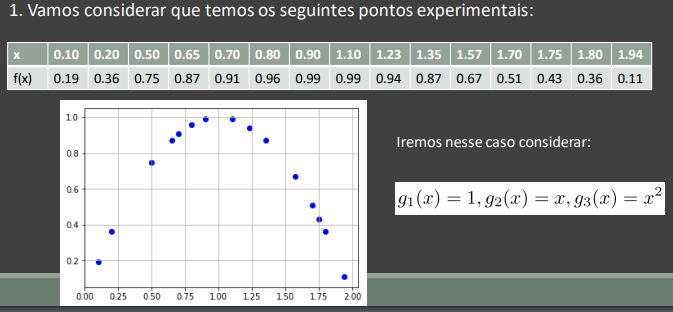

In [11]:
#Definindo os valores de x, fx e o tamanho da matriz A e b
x = np.array([0.1, 0.2, 0.5, 0.65, 0.7, 0.8, 0.9, 1.1, 1.23, 1.35, 1.57, 1.7, 1.75, 1.8, 1.94])
fx = np.array([0.19, 0.36, 0.75, 0.87, 0.91, 0.96, 0.99, 0.99, 0.94, 0.87, 0.67, 0.51, 0.43, 0.36, 0.11])
n = 3

A, b = ajuste(x, fx, n)

#Encontrando os coeficientes da função para ajuste
alpha = elimgauss(A,b)
print('Os coeficientes da função de ajuste, do menor para o maior grau, são: %s' %(alpha))

Os coeficientes da função de ajuste, do menor para o maior grau, são: [ 8.0000e-04  1.9953e+00 -9.9900e-01]


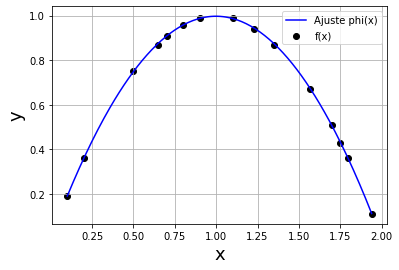

In [12]:
#Definindo a função phi(x) utilizando os coeficientes alpha para ajuste
xmult = np.linspace(0.1, 1.94, 200)
phix = alpha[0] * 1 + alpha[1] * xmult + alpha[2] * (xmult**2)

#Encontrando o desvio de phi(x) em relação a f(x)
#Quanto menor o desvio, melhor foi o ajuste
#desvio = np.sum((fx - phix)**2)
#print('O desvio de phi(x) em relação a f(x) foi: %f' %(desvio))
#print('-' * 80)

#Plotando o gráfico de f(x) e phi(x)
fig, ax = plt.subplots()
ax.scatter(x, fx, color='black', label='f(x)')
ax.plot(xmult, phix, color='blue', label='Ajuste phi(x)')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.legend()

plt.grid()
plt.show()

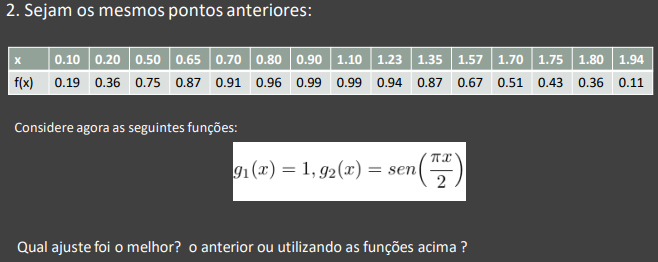

Os coeficientes da função de ajuste, do menor para o maior grau, são: [0.0533 0.9594]
--------------------------------------------------------------------------------


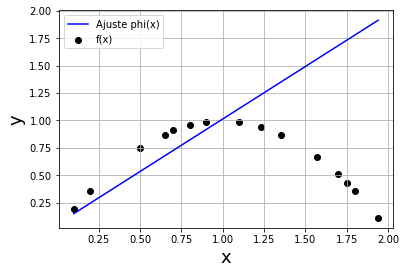

--------------------------------------------------------------------------------
É possível perceber que, em relação ao outro ajuste, esse teve maior desvio e o ajuste não se aproxima do gráfico f(x)


In [13]:
#Definindo os valores de x, fx e o tamanho da matriz A e b
x = np.array([0.1, 0.2, 0.5, 0.65, 0.7, 0.8, 0.9, 1.1, 1.23, 1.35, 1.57, 1.7, 1.75, 1.8, 1.94])
fx = np.array([0.19, 0.36, 0.75, 0.87, 0.91, 0.96, 0.99, 0.99, 0.94, 0.87, 0.67, 0.51, 0.43, 0.36, 0.11])
n = 2

#Utilizando a função de ajuste para encontrar os coeficientes alpha
A = np.zeros((n,n), dtype='float')
b = np.zeros((n,1), dtype='float')
#Mudar as funções de aproximação g
g = np.array([np.array([1]*15), np.sin((np.pi*x)/2)], dtype='object')
for i in range(n):
  for j in range(n):
    A[i,j] = np.sum(g[i] * g[j])
  
for k in range(n):
  b[k,0] = np.sum(fx * g[k])

#Encontrando os coeficientes da função para ajuste
alpha = elimgauss(A,b)
print('Os coeficientes da função de ajuste, do menor para o maior grau, são: %s' %(alpha))
print('-' * 80)

#Definindo a função phi(x) utilizando os coeficientes alpha para ajuste
xmult = np.linspace(0.1, 1.94, 200)
phix = alpha[0] * 1 + alpha[1] * xmult

#Encontrando o desvio de phi(x) em relação a f(x)
#Quanto menor o desvio, melhor foi o ajuste
#desvio = np.sum((fx - phix)**2)
#print('O desvio de phi(x) em relação a f(x) foi: %f' %(desvio))
#print('-' * 80)

#Plotando o gráfico de f(x) e phi(x)
fig, ax = plt.subplots()
ax.scatter(x, fx, color='black', label='f(x)')
ax.plot(xmult, phix, color='blue', label='Ajuste phi(x)')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.legend()

plt.grid()
plt.show()
print('-' * 80)
print('É possível perceber que, em relação ao outro ajuste, esse teve maior desvio e o ajuste não se aproxima do gráfico f(x)')

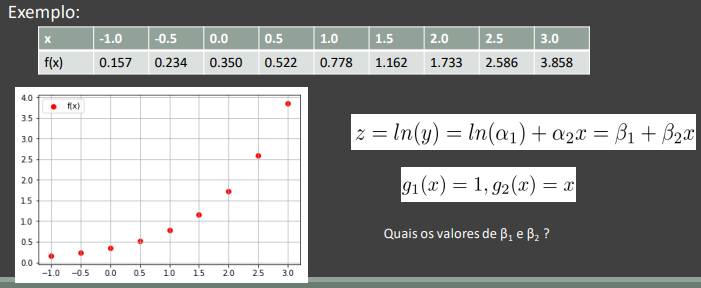
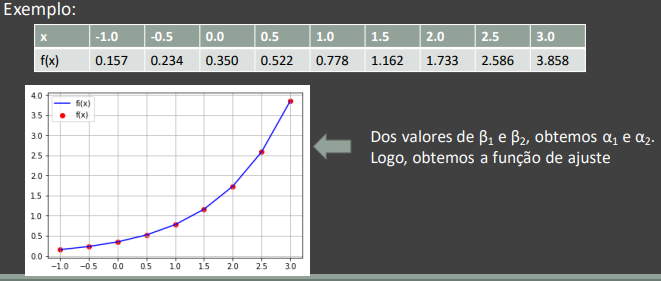

Os coeficientes da função de ajuste, alpha 1 e alpha 2 respectivamente, são: 0.3496 e 0.8005


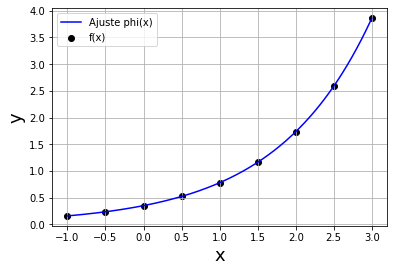

In [15]:
#Definindo os valores de x, f(x), z (ln (f(x)) e o tamanho da matriz A e b
x = np.array([-1.0, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
fx = np.array([0.157, 0.234, 0.350, 0.522, 0.778, 1.162, 1.733, 2.586, 3.858])
z = np.log(fx)
n = 2

A = np.zeros((n,n), dtype='float')
b = np.zeros((n,1), dtype='float')
#Mudar as funções de aproximação g
g = np.array([np.array([1]*9), x], dtype='object')
for i in range(n):
  for j in range(n):
    A[i,j] = np.sum(g[i] * g[j])
  
for k in range(n):
  b[k,0] = np.sum(z * g[k])

#Encontrando os coeficientes da linearização
beta = elimgauss(A,b)

#Encontrando os coeficientes para ajuste
alpha2 = beta[1]
alpha1 = np.exp(beta[0])
print('Os coeficientes da função de ajuste, alpha 1 e alpha 2 respectivamente, são: %.4f e %.4f' %(alpha1, alpha2))

#Definindo a função de ajuste
xmult = np.linspace(-1, 3, 200)
phix = alpha1 * (np.exp(alpha2 * xmult))

#Encontrando o desvio de phi(x) em relação a f(x)
#Quanto menor o desvio, melhor foi o ajuste
#desvio = np.sum((fx - phix)**2)
#print('O desvio de phi(x) em relação a f(x) foi: %f' %(desvio))
#print('-' * 80)

#Plotando o gráfico de f(x) e phi(x)
fig, ax = plt.subplots()
ax.scatter(x, fx, color='black', label='f(x)')
ax.plot(xmult, phix, color='blue', label='Ajuste phi(x)')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.legend()

plt.grid()
plt.show()